## 读写文本格式的数据
### 一次全部读取
pandas提供了多种读取方法，将表格型数据读取为DataFrame对象。

In [1]:
import pandas as pd

In [2]:
# read_csv 以逗号分隔符
df1 = pd.read_csv('~/test/a.csv')
df1

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [3]:
# read_table 默认以\t为分隔符，手工指定sep
# 如果有多种分隔符，或者数量不定的不太规则的分隔符，sep支持使用正则表达式进行匹配
df2 = pd.read_table('~/test/a.csv', sep=',')
df2

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


上面默认将第一行作为列名。对于没有列名的数据，可进行指定

In [4]:
# 使用默认列名
df3 = pd.read_csv('~/test/b.csv', header=None)
df3

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
# 手动指定列名
# 手动指定某一列作为行索引
names = ['a', 'b', 'c', 'd', 'message']
df4 = pd.read_csv('~/test/b.csv', names=names, index_col='message')
# 上面这句不仅指定了列名names的列表，而且指定了将'message'列作为行的索引。
df4

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [7]:
# 支持层次化索引
# 只需指定index_col为一个列表（各层次）
df5 = pd.read_csv('~/test/c.csv', index_col=['key1', 'key2'])
df5

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [8]:
# skiprows 支持跳过某些行，以处理异形文件格式
df6 = pd.read_csv('~/test/a.csv', skiprows=[2])
df6

,a,b,c,d,message
0,1,2,3,4,hello
1,9,10,11,12,foo


In [9]:
# 缺失值处理
# pandas默认可识别NA、NULL等字符串，认为它们所在的位置为缺失值
# 比如，如下内容
!cat ~/test/d.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,NA,world
9,NULL,11,12,foo


In [16]:
# 载入结果，可以看到NULL和NA都被认为是缺失值
df7 = pd.read_csv('~/test/d.csv')
df7

,a,b,c,d,message
0,1,2.0,3,4.0,hello
1,5,6.0,7,NaN,world
2,9,NaN,11,12.0,foo


In [17]:
# na_values
# 可以专门指定缺失值标记
# 比如下面的文件
!cat ~/test/e.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,NNA,world
9,NULLL,11,12,foo


In [19]:
df8 = pd.read_csv('~/test/e.csv', na_values=['NNA'])
df8
# 可以看到，未别指定为缺失标记的NULLL就未被当做缺失

,a,b,c,d,message
0,1,2,3,4.0,hello
1,5,6,7,NaN,world
2,9,NULLL,11,12.0,foo


In [20]:
# 也可以用一个字典为各列指定不同的缺失值表示方法
df9 = pd.read_csv('~/test/e.csv', na_values={'b':'NULLL','d':'NNA'})
df9

,a,b,c,d,message
0,1,2.0,3,4.0,hello
1,5,6.0,7,NaN,world
2,9,NaN,11,12.0,foo


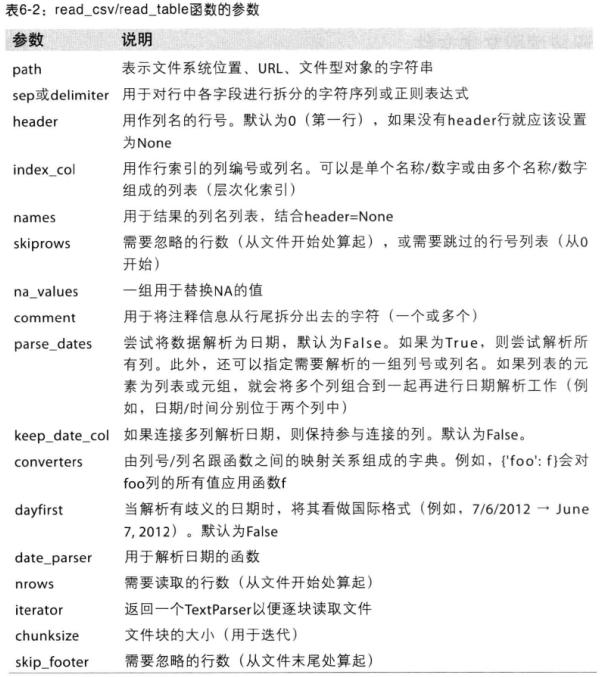

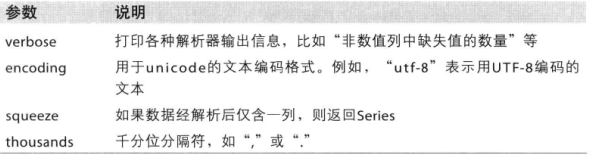

### 按块读取文本文件

In [22]:
# 只读取几行
pd.read_csv('~/test/f.csv', nrows=5)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
3,1,1,1,1,hh
4,2,2,2,2,two


In [26]:
# 逐块读取
chunker = pd.read_csv('~/test/f.csv', chunksize=3)
tot = pd.DataFrame()
i = 0
for piece in chunker:
    tot = tot.append(piece)
    i += 1
tot,i

(   a   b   c   d message
 0  1   2   3   4   hello
 1  5   6   7   8   world
 2  9  10  11  12     foo
 3  1   1   1   1      hh
 4  2   2   2   2     two
 5  3   3   3   4   three
 6  4   4   4   4    four
 7  5   5   5   5    five, 3)

### 数据写入到文本文件

In [32]:
# 写入到csv，注意这里指定文件名为stdout是控制台
data = pd.read_csv('~/test/d.csv')
data

,a,b,c,d,message
0,1,2.0,3,4.0,hello
1,5,6.0,7,NaN,world
2,9,NaN,11,12.0,foo


In [33]:
# to_csv
from os import sys
data.to_csv(sys.stdout, sep='|')# 默认逗号分割，可指定分隔符

|a|b|c|d|message
0|1|2.0|3|4.0|hello
1|5|6.0|7||world
2|9||11|12.0|foo


In [34]:
# 空值默认用空字符串表示
# na_rep指定空值用什么标记
data.to_csv(sys.stdout, na_rep='NAN')

,a,b,c,d,message
0,1,2.0,3,4.0,hello
1,5,6.0,7,NAN,world
2,9,NAN,11,12.0,foo


In [35]:
# 默认会在文件里写入行和列的标签，可显式禁用
data.to_csv(sys.stdout, index=False, header=False)

1,2.0,3,4.0,hello
5,6.0,7,,world
9,,11,12.0,foo


### 处理不规范的文件
比如，csv中每行有5个元素，但出现了一行有6个元素，会导致read_table之类的出现问题。
使用python中内置的csv库，可以进行一些更细致的csv操作。
这里不再赘述，参见书籍p171

### 处理JSON数据

In [40]:
# python自带的json库
# json.loads
import json
json_string = '''
{"name":"Wes",
"places_lived":["United States", "Spain", "Germany"],
"pet":null,
"siblings":[{"name":"Scott","age":25,"pet":"Zuko"},
            {"name":"Katie", "age":23, "pet":"Cisco"}]}
'''
res = json.loads(json_string)
res

{'name': 'Wes',
 'pet': None,
 'places_lived': ['United States', 'Spain', 'Germany'],
 'siblings': [{'age': 25, 'name': 'Scott', 'pet': 'Zuko'},
  {'age': 23, 'name': 'Katie', 'pet': 'Cisco'}]}

In [41]:
# json.dumps
json_string2 = json.dumps(res)
json_string2

'{"siblings": [{"name": "Scott", "pet": "Zuko", "age": 25}, {"name": "Katie", "pet": "Cisco", "age": 23}], "name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null}'

In [43]:
# 将json对象的某部分传入DataFrame，即可转换为df
# columns可以指定只转换部分字段，也可以不指定，转换全部字段
siblings = pd.DataFrame(res['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,25
1,Katie,23


In [45]:
# to_json // dataframe对象自带的to_json方法
siblings.to_json()

'{"name":{"0":"Scott","1":"Katie"},"age":{"0":25,"1":23}}'

更多详情ref： http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html

### 处理xml、html等数据
这里不在赘述，参见书176页

## 其他
二进制数据、EXcel、连接数据库等内容详见书